In [ ]:
import numpy as np

from torchvision.transforms.functional import pil_to_tensor
from diffusers import AutoPipelineForInpainting
from diffusers.utils import (
    make_image_grid,
    load_image
)

from PIL import Image, ImageDraw

In [ ]:
fine_tuned = 'model_ckpts/constant_bs32/dreambooth'

pipe = AutoPipelineForInpainting.from_pretrained(
    fine_tuned,
    safety_checker=None,
    requires_safety_checker=False
)
pipe.to('cuda');

In [3]:
img = Image.open('.test_img/demo.png').convert('RGB')
mask = Image.open('.test_img/demo_mask.png').convert('L')
img2 = Image.open('.test_img/demo_2.jpg').convert('RGB')
mask2 = Image.open('.test_img/mask.png').convert('L')

pt_img = pil_to_tensor(img.resize((512, 512))) / 255
pt_mask = (pil_to_tensor(mask.resize((512, 512))) / 255)
pt_img2 = pil_to_tensor(img2.resize((512, 512))) / 255
pt_mask2 = (pil_to_tensor(mask2.resize((512, 512))) / 255)

In [ ]:
res = pipe('', image=pt_img, mask_image=pt_mask, num_inference_steps=70)
res2 = pipe('', image=pt_img2, mask_image=pt_mask2, num_inference_steps=70)

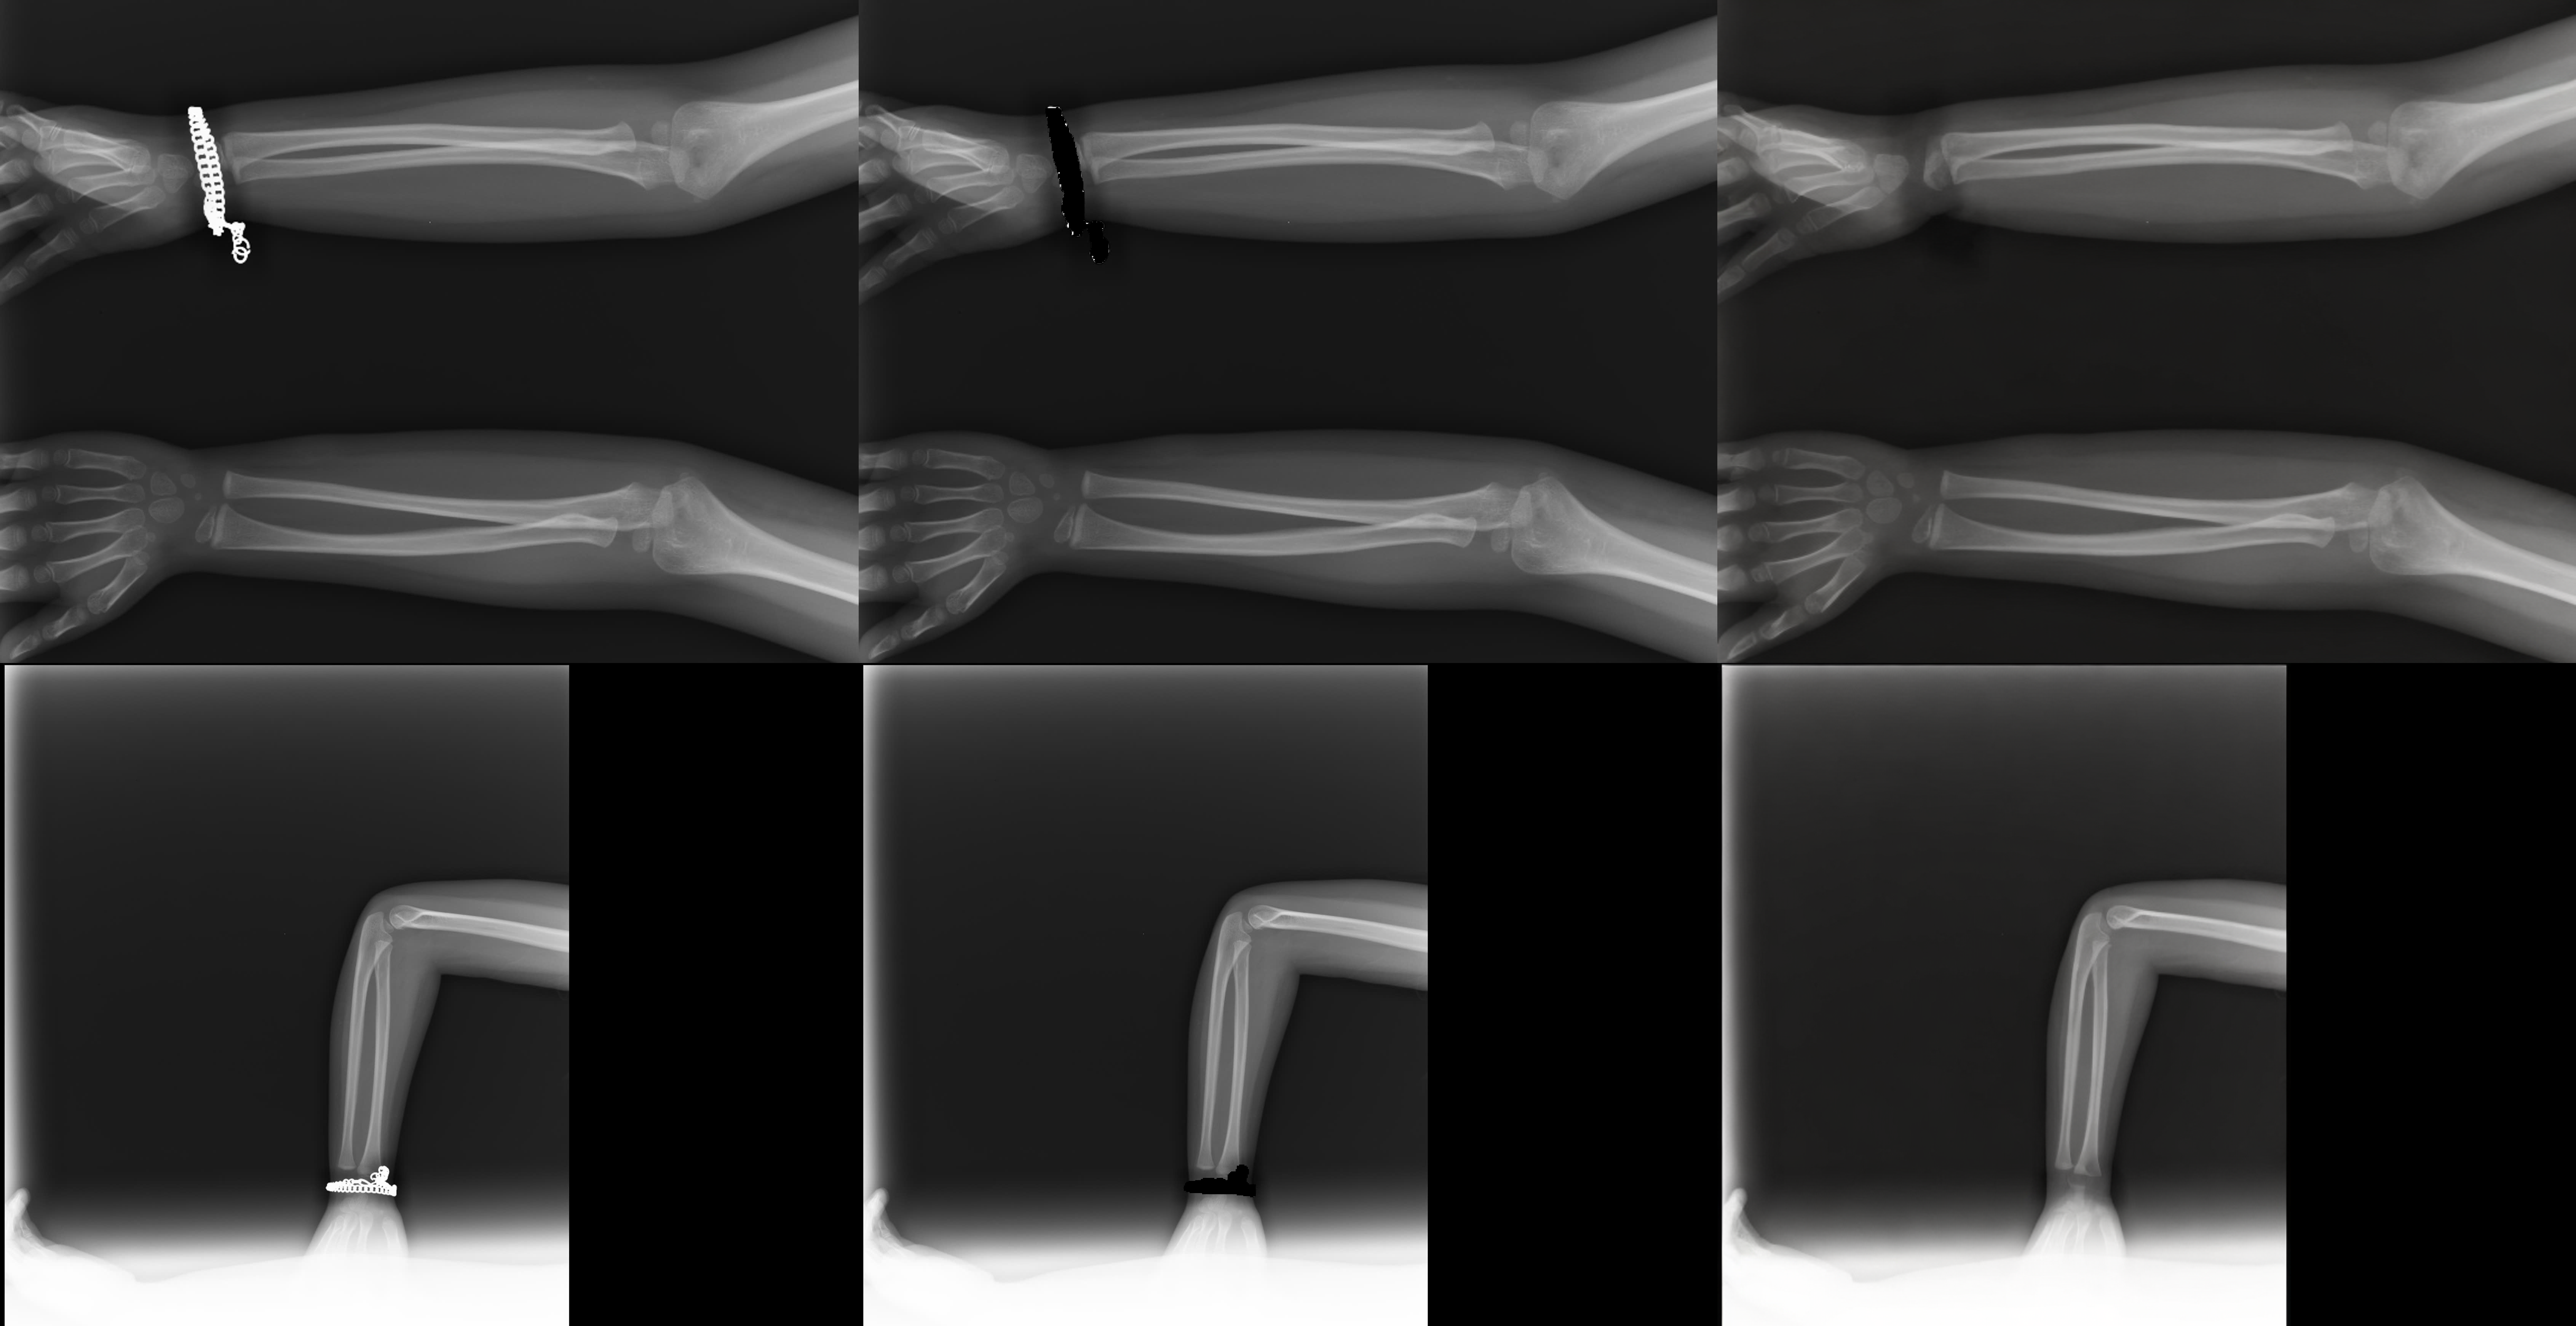

In [18]:
np_img = np.array(img)
np_mask = np.tile(np.array(mask)[:,:,None], (1, 1, 3)) // 255
np_img2 = np.array(img2)
np_mask2 = np.tile(np.array(mask2)[:,:,None], (1, 1, 3)) // 255

make_image_grid(
    [
        img,
        Image.fromarray(np_img * (1 - np_mask)),
        res.images[0].resize(img.size),
        img2,
        Image.fromarray(np_img2 * (1 - np_mask2)),
        res2.images[0].resize(img2.size),
    ],
    2, 3
)